In [1]:
import matplotlib.pyplot as plt
from numpy import * 

from IPython.core.display import display,HTML
display(HTML("<style>.container{width:100% !important;}</style>"))

In [2]:
# functions

def fseries(ypts, time, bins, rate): 
    """ kth fourier coeff = sum(n=0,N,exp(-i*2pi*k*n*t/N))
        'ypts': data, 1D array-like
        'time': sampling time [s]
        'bins': number of frequency bins
        'rate': sampling rate [Hz]
    """
    N = len(ypts)
    coeffs = empty(bins,complex)
    res = int(rate/bins) # Hz/bin
    t = time
    
    # get the fourier coeffs
    for k in range(bins)[:int(bins/2)]:
        
        # the two out front is justified from dropping the bins for which f > f_nyquist
        # /N to scale by sample size
        coeffs[k] = 2*sum([ypts[n]*(cos(2*pi*k*n*t/N) + 1j*sin(2*pi*k*n*t/N)) for n in range(N)])/N
        
    # don't calculate frequencies above nyquist rate, i.e. sampling rate/2 (so just drop upper half of bins)
    coeffs[int(bins/2-1):] = zeros(int(bins/2+1))            
    
    return coeffs

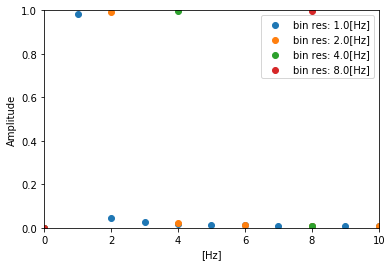

In [14]:
# example: 1 Hz sine wave, different bin resolutions

srates = [32,64,128,256] # [Hz] sample rate
bins = 32 # bin resolution is srate/bins
stime = 1 # range(1,2) # [s] range of sample times
 
f = 1 # [Hz] of input wave

for srate in srates:
    swave = sin(2*pi*f*linspace(0,stime,srate)) # sampled wave
    dft = fseries(swave,stime,bins,srate)
    len(dft)
    plt.scatter(arange(0, srate, srate/bins),abs(dft),label=f"bin res: {srate/bins}[Hz]")
    plt.ylim((0,1))
    plt.xlim((0,10))
    plt.ylabel('Amplitude')
    plt.xlabel('[Hz]')
    plt.legend()

array([0])